# EXERCISE
1.IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.LOADING THE CSV FILE

In [2]:
housing_data=pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


3.DATA CLEANING/PREPROCESSING

In [4]:
housing_data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing_data.dropna(subset='total_bedrooms')
# housing_data.isnull().sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
# housing_data['total_bedrooms']=housing_data['total_bedrooms'].dropna()

In [6]:
housing_data=housing_data.dropna(subset=['total_bedrooms'])

In [7]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
x=housing_data[['median_income','housing_median_age','total_rooms','total_bedrooms']].values
y=housing_data['median_house_value'].values
x = (x -x.mean())/x.std()

4.COMPUTING LOSSES


In [13]:
def computing_loss(x,y,weight,bias,learning_rate=0.001):
    predictions=x@ weight +bias
    loss=predictions-y
    return np.mean((loss)**2)

5.GRADIENT 

In [14]:
def gradient_descent(x_batch,y_batch,weight,bias,learning_rate=0.001,):
    n=len(x_batch)
    predictions=x_batch@weight+bias
    error=predictions-y_batch

    gradient_weight=(2/n)*np.sum(error@x_batch)
    gradient_bias=(2/n)*np.sum(error)

    weight-=learning_rate*gradient_weight
    bias-=learning_rate*gradient_bias

    return weight,bias

6.MANUAL MODEL TRAINING


*batch sizes 
           __full batch

           __mini batch(size=32)
           
           __SGD(batch size=1)

In [43]:
# def training_model(x,y,batch_size=len(x),learning_rate=0.001,epochs=1000):
#     np.random.seed(42)
#     weight=np.random.rand()
#     bias=np.random.rand()
#     losses=[]

#     for epoch in range(epochs):
#         indices=np.random.permutation(len(y))
#         x_shuffled=x[indices]
#         y_shuffled=y[indices]

#         for h in range(0,len(y),batch_size):
#             x_batch=x_shuffled[h:h+batch_size]
#             y_batch=y_shuffled[h:h+batch_size]
#             weight,bias=gradient_descent(x_batch,y_batch,weight,bias,learning_rate)
#         loss=computing_loss(x,y,learning_rate)    
#         losses.append(loss)

In [33]:
def training_model(x,y,batch_size=12,learning_rate=0.001,epochs=1000):
    np.random.seed(42)
    weight=np.random.randn(x.shape[1])*0.001
    bias=np.random.randn()*0.001
    losses=[]

    for epoch in range(epochs):
        indices=np.random.permutation(len(y))
        x_shuffled=x[indices]
        y_shuffled=y[indices]

        for h in range(0,len(y),batch_size):
            x_batch=x_shuffled[h:h+batch_size]
            y_batch=y_shuffled[h:h+batch_size]
            weight,bias=gradient_descent(x_batch,y_batch,weight,bias,learning_rate)
        loss=computing_loss(x,y,weight,bias,learning_rate)    
        losses.append(loss)
    return losses

In [41]:
loss_full_batch_size=training_model(x,y,learning_rate=0.001,batch_size=len(x),epochs=1000)
loss_mini_batch_size=training_model(x,y,learning_rate=0.0001,batch_size=32,epochs=1000)
# loss_SGD=training_model(x,y,learning_rate=0.001,batch_size=1,epochs=1000)

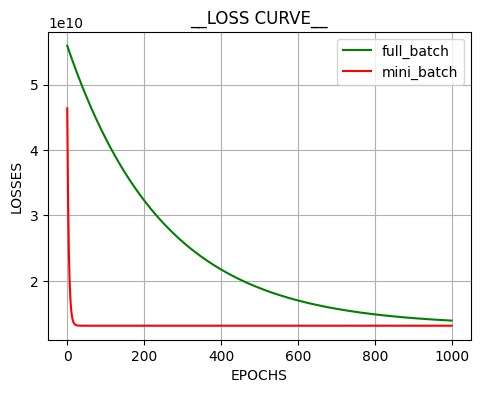

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(loss_full_batch_size,label='full_batch',color='green')
plt.plot(loss_mini_batch_size,label='mini_batch',color='red')
# plt.plot(loss_SGD,label='SGD',color='blue')
plt.title('__LOSS CURVE__')
plt.xlabel('EPOCHS')
plt.ylabel('LOSSES')
plt.grid(True)
plt.legend()

plt.show()